# 위상 정렬
---

위상 정렬이란 방향 그래프의 모든 노드를 **방향성에 거스르지 않도록 순서대로 나열하는것**이다. <br>
위상 정렬 알고리즘을 자세히 살펴보기 전에, 먼저 **진입차수**를 알아야 한다. 진입차수란 특정한 노드로 들어오는 간선의 개수를 의미한다.

1. 진입차수가 0인 노드를 큐에 넣는다.
2. 큐가 빌 때까지 다음의 과정을 반복한다.
    1. 큐에서 원소를 꺼내 해당 노드에서 출발하는 간선을 그래프에서 제거한다.
    2. 새롭게 진입차수가 0이 된 노드를 큐에 넣는다.

이 알고리즘을 이용하면 간단하게 위상 정렬을 수행할 수 있다. 알고리즘에서도 확인할 수 있듯이 큐가 빌 때까지 큐에서 월소를 계속 꺼내서 처리하는 과정을 반복한다. 이때 모든 원소를 방문하기 전에 큐가 빈다면 사이클이 존재한다고 판단할 수 있다.

(기본적인 위상 정렬 문제에서는 사이클이 발생하지 않는다고 명시하는 경우가 더 많다)

다음 그래프를 예로 설명하겠다.

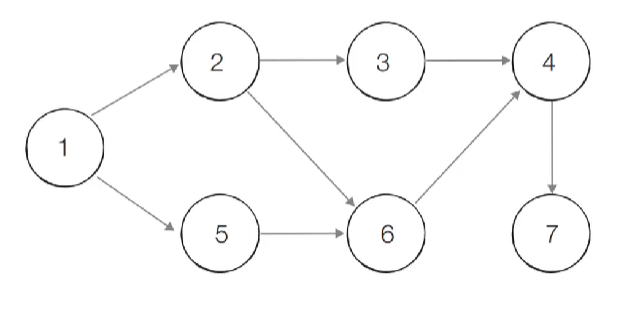

1을 큐에 넣고 큐에서 꺼내면서 노드 1과 연결되어 있는 간선들을 제거한다. 제거하면서 **집입 차수**가 0이 된 노드를 큐에 넣고 이 과정을 반복한다. 

위 과정을 수행하는 동안 큐에서 빠져나간 노드를 순서대로 출력하면, 그것이 바로 위상 정렬을 수행한 결과가 된다.

In [1]:
from collections import deque

v = 7

# 모든 노드에 대한 집입차수는 0으로 초기화
indegree = [0] * (v + 1)

# 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트(그래프) 초기화
graph = [[] for _ in range(v + 1)]

graph[1].append(2) # 1에서 2로 이동
indegree[2] += 1 # 집입 차수 1 증가

graph[1].append(5) 
indegree[5] += 1

graph[2].append(3)
indegree[3] += 1

graph[2].append(6)
indegree[6] += 1

graph[3].append(4)
indegree[4] += 1

graph[4].append(7)
indegree[7] += 1

graph[5].append(6)
indegree[6] += 1

graph[6].append(4)
indegree[4] += 1

In [2]:
def topology_sort():
    result = []
    q = deque()
    
    # 처음에 시작할 때, 노드의 집입차수가 0인 노드를 큐에 삽입
    for i in range(1, v + 1):
        if indegree[i] == 0:
            q.append(i)
        
    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        result.append(now)
        
        # 해당 원소와 연결된 노드들의 집입차수에서 1 빼기
        for i in graph[now]:
            indegree[i] -= 1
            # 새롭게 집입 차수가 0이 된 노드 삽입
            if indegree[i] == 0:
                q.append(i)
    
    return result

topology_sort()

[1, 2, 5, 3, 6, 4, 7]

## 위상 정렬의 시간 복잡도

위상 정렬의 시간 복잡도는 노드와 간선을 모두 확인한다는 측면에서 `O(노드 개수 + 간선 개수)`이다. 